# Análise do COVID-19 no Brasil (Óbitos)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv").fillna(0)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,18
1,0,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,23
2,0,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,293
3,0,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,29
4,0,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,0,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,1,2,2,2,2,2
6,0,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,39,43,44,48,56,63,72,82,83,90
7,0,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,7,7,7,8,8,9,10,12,13,13
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,12,12,16,18,21,21,21,22,23,24


## 2. Total de óbitos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedDeathsGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedDeathsGroupedDf = confirmedDeathsGroupedDf.sort_values(by=['Deaths'], ascending = False)
    return sortedConfirmedDeathsGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Deaths"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,8407,9619,10783,12722,14695,16478,18586,20463,22020,22020
Italy,0,0,0,0,0,0,0,0,0,0,...,15362,15887,16523,17127,17669,18279,18849,19468,19899,19899
Spain,0,0,0,0,0,0,0,0,0,0,...,11947,12641,13341,14045,14792,15447,16081,16606,17209,17209
France,0,0,0,0,0,0,0,0,0,0,...,7574,8093,8926,10343,10887,12228,13215,13851,14412,14412
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,4320,4943,5385,6171,7111,7993,8974,9892,10629,10629
Iran,0,0,0,0,0,0,0,0,0,0,...,3452,3603,3739,3872,3993,4110,4232,4357,4474,4474
Belgium,0,0,0,0,0,0,0,0,0,0,...,1283,1447,1632,2035,2240,2523,3019,3346,3600,3600
China,17,18,26,42,56,82,131,133,171,213,...,3330,3333,3335,3335,3337,3339,3340,3343,3343,3343
Germany,0,0,0,0,0,0,0,0,0,0,...,1444,1584,1810,2016,2349,2607,2767,2736,3022,3022


### 2.1 Total de óbitos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,445,486,564,686,819,950,1057,1124,1223,1223


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
deaths = confirmedCasesByDayBrazilDf.iloc[0,:-1].astype('int32')

dfForPlot = pd.DataFrame(
    {'date': dates, 'deaths': deaths})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,deaths
4/3/20,2020-04-03,359
4/4/20,2020-04-04,445
4/5/20,2020-04-05,486
4/6/20,2020-04-06,564
4/7/20,2020-04-07,686
4/8/20,2020-04-08,819
4/9/20,2020-04-09,950
4/10/20,2020-04-10,1057
4/11/20,2020-04-11,1124
4/12/20,2020-04-12,1223


Text(0, 0.5, 'Deaths')

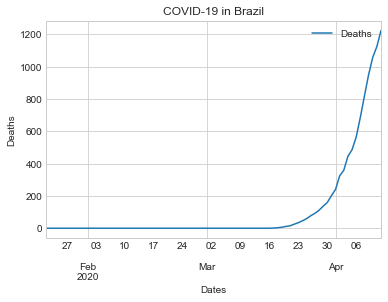

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['deaths'].plot(legend=True, grid=True, label='Deaths');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Deaths")

### 2.2 Total de óbitos diários somente nos EUA

In [7]:
confirmedCasesByDayUsDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayUsDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,...,15362,15887,16523,17127,17669,18279,18849,19468,19899,19899


In [8]:
datesUs = list(confirmedCasesByDayUsDf)[:-1]
deathsUs = confirmedCasesByDayUsDf.iloc[0,:-1]

dfForPlotUs = pd.DataFrame(
    {'date': datesUs, 'deaths': deathsUs})
dfForPlotUs['date'] = pd.to_datetime(dfForPlotUs['date'])
dfForPlotUs.tail()

,date,deaths
4/8/20,2020-04-08,17669
4/9/20,2020-04-09,18279
4/10/20,2020-04-10,18849
4/11/20,2020-04-11,19468
4/12/20,2020-04-12,19899


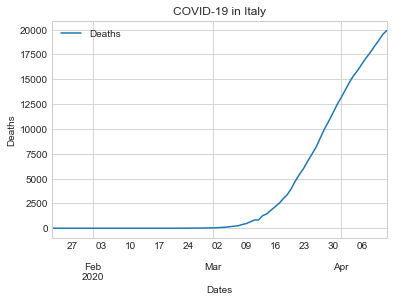

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotUs.set_index('date')['deaths'].plot(legend=True, grid=True, label='Deaths');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.legend()

## 3. Total de óbitos acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Deaths']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Deaths'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Deaths
Country/Region,
US,22020
Italy,19899
Spain,17209
France,14412
United Kingdom,10629
...,...
Guinea-Bissau,0
Equatorial Guinea,0
Dominica,0


### 3.1 Total de óbitos acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Deaths
Country/Region,
Brazil,1223


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'deaths': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Deaths')
    df.set_index('dates')['deaths'].plot(legend=True, grid=True, label='Predicted Deaths')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Deaths")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Deaths')
    red_patch = mpatches.Patch(color='red', label='Confirmed Deaths')
    plt.legend(handles=[red_patch, blue_patch])

In [13]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['deaths'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['deaths']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['deaths']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   45,   89,  134,  179,  223,  267,  312,  357,  401,  446,
        491,  535,  580,  625,  670,  714,  759,  804,  848,  893,  938,
        983, 1027, 1072, 1117, 1161, 1206, 1251, 1296, 1340, 1385, 1430,
       1474, 1519, 1564, 1609, 1653, 1698, 1743, 1787, 1832, 1877, 1922,
       1966, 2011, 2056, 2100, 2145, 2190, 2235, 2279, 2324, 2369, 2413,
       2458, 2503, 2548, 2592, 2637, 2682, 2726, 2771, 2816, 2861, 2905,
       2950, 2995, 3039, 3084, 3129, 3174, 3218, 3263, 3308, 3352, 3397,
       3442, 3487, 3531, 3576, 3621, 3665, 3710, 3755, 3800, 3844])

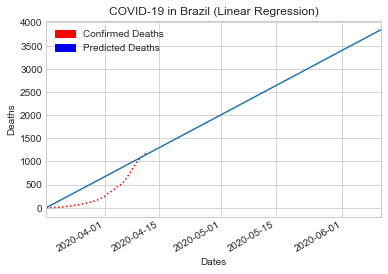

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 4.2 Regressão Polinomial grau 2

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

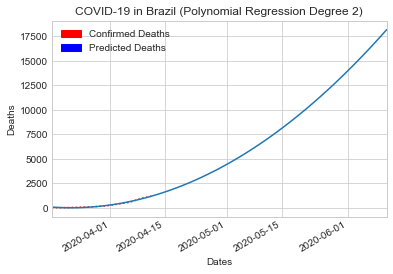

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression Degree 2")

### 4.3 Regressão Polinomial grau 3

In [18]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

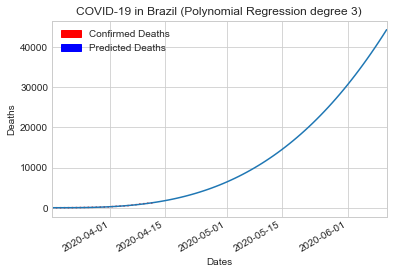

In [19]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression degree 3")

### 4.4 Regressão Polinomial grau 4

In [42]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
y = np.flip(y, 0)

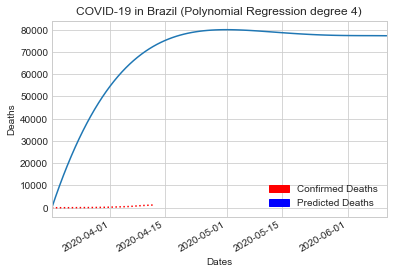

In [43]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression degree 4")

### 4.5 Logistic and Exponential Curve

In [22]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [23]:
def exponential_model(x, a, b, c):
    return a*np.exp(b*(x-c+10))

In [24]:
import datetime

dfForPlotBrazil = dfForPlot
dfForPlotBrazil = dfForPlotBrazil[dfForPlotBrazil['deaths'] > 0]
date_first_infection = dfForPlotBrazil['date'].iloc[0]

dfForPlotBrazil.loc[:,'date'] = dfForPlotBrazil['date'].map(lambda x: (x - date_first_infection).days)
dfForPlotBrazil

c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,deaths
3/17/20,0,1
3/18/20,1,3
3/19/20,2,6
3/20/20,3,11
3/21/20,4,15
3/22/20,5,25
3/23/20,6,34
3/24/20,7,46
3/25/20,8,59
3/26/20,9,77


Infection speed     = 4.354
Total infected      = 1921
40 dias =  2020-04-26 00:00:00


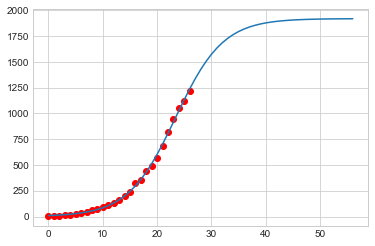

In [25]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(logistic_model, x, y, maxfev=100000)

sol = int(fsolve(lambda x: logistic_model(x, fit[0][0], fit[0][1], fit[0][2]) - int(fit[0][2]), fit[0][1]))
end = date_first_infection + datetime.timedelta(days=sol)

pred_x = list(range(max(x), sol))
y_l=[logistic_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_l, label="Logistic model")

peakday = date_first_infection + datetime.timedelta(days=fit[0][1])
print("Infection speed     = %.3f" % fit[0][0])
print("Total infected      = %.0f" % fit[0][2])
print("40 dias = ", date_first_infection + datetime.timedelta(days=40))

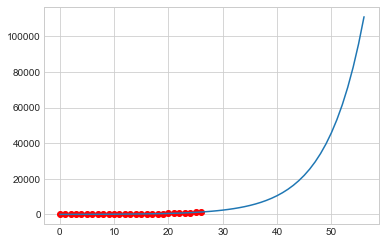

In [26]:
x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(exponential_model, x, y)

y_e = [exponential_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_e, label="Exponential model")